# **Notebook contents :**

1 - Problem Statement

2 - Data studying

3 - Data Collection

4 - Data cleaning and preprocessing

5 - Exploratory Data  Analysis (EDA)

6 - Feature Engneering

7 - Data Modelling

**1 - Problem Statement:**

**Goal:** Develop a machine learning model to classify news articles as "fake" or "real."

**Importance:** Combating misinformation and promoting accurate information.

**Data:** The "train.csv" and "test.csv" datasets, containing news articles and their true labels.

**2 - Data Studying:**

**ID :**  ID of the new (integer)

**title :** The title news (string)

**text :** The content of news (string)

**subject :** Under what subject does the news fall (string)

**date :** The date on which the news was published (date)

**class :** The class in which the news is classified, 0 -> fake
1 -> not fake (boolean)

**3 - Data Collection :**

Importing the important libraries :

In [ ]:
#Import all libraries and modules
# Installation
!pip install catboost

# Suppress warnings to improve readability
import warnings
warnings.filterwarnings("ignore")

# Core libraries for data manipulation and analysis
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt    # Plotting
import seaborn as sns             # Enhanced plotting
import plotly.express as px       # Interactive visualization
from wordcloud import WordCloud   # Word cloud generation

# Utilities for working with text data
from collections import Counter   # Count word frequencies

# Scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split # Split data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text to numerical features
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # Evaluate model performance
from sklearn.pipeline import make_pipeline # Streamline model building and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier # Ensemble models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neural_network import MLPClassifier  # Neural Network

# Additional machine learning libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Library for sentiment analysis
from textblob import TextBlob

# Natural Language Toolkit (NLTK) for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re  # Regular expressions for text cleaning

# Download NLTK resources (stopwords, tokenization, and lemmatization models)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Collecting Data :**

- We will load the data from csv files to a Pandas DataFrames :

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/GDSC Final/test.csv")
print("Test DataFrame:")
#Display the first few rows of the train dataset
test_df.head()

Test DataFrame:


,ID,title,text,subject,date
0,1,U.S. judge presses Trump administration on Dre...,NEW YORK (Reuters) - A U.S. judge on Thursday ...,politicsNews,21-Sep-17
1,2,U.S. judge questions government on Trump's lat...,"GREENBELT, Md. (Reuters) - A U.S. judge on Mon...",politicsNews,16-Oct-17
2,3,U.S. judge questions states seeking to restore...,SAN FRANCISCO (Reuters) - A U.S. judge on Mond...,politicsNews,23-Oct-17
3,4,U.S. judge refuses to halt New York nuclear po...,NEW YORK (Reuters) - A federal judge on Tuesda...,politicsNews,25-Jul-17
4,5,U.S. judge rejects bid to dismiss Indonesian i...,BOSTON (Reuters) - A federal judge on Wednesda...,worldnews,25-Oct-17


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496 entries, 0 to 4495
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       4496 non-null   int64 
 1   title    4496 non-null   object
 2   text     4496 non-null   object
 3   subject  4496 non-null   object
 4   date     4496 non-null   object
dtypes: int64(1), object(4)
memory usage: 175.8+ KB


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/GDSC Final/train.csv")
print("Train DataFrame:")
# Display the first few rows of the train dataset
train_df.head()

Train DataFrame:


,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       40406 non-null  float64
 1   title    40427 non-null  object 
 2   text     40427 non-null  object 
 3   subject  40414 non-null  object 
 4   date     40414 non-null  object 
 5   class    40414 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


In [ ]:
train_df.shape

(44919, 6)


# **4 - Data cleaning and preprocessing:**

In [ ]:
train_df.dropna(subset=['title', 'text'], inplace=True)
train_df = train_df.dropna(subset=['ID'])
train_df['subject'].fillna('Unknown', inplace=True)
train_df['date'].fillna('Unknown', inplace=True)
train_df['class'] = train_df['class'].fillna(train_df['class'].mode()[0])  # Fill with the most frequent value

*   dropping the null values in (text, title and ID) coulmns
*   fill the null values in (date) coulmn with "Unkown" and in class with mode value




**Data Type Conversion and Handling missing values :**

In [ ]:
# Convert 'class' and 'ID' columns to int64
train_df['class'] = train_df['class'].astype('int64')
train_df['ID'] = train_df['ID'].astype('int64')
# Convert 'date' column to datetime
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')
# Handle NaT values after conversion
train_df['date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
test_df['date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

**Check the duplicates and drop them :**

In [ ]:
duplicate_rows = train_df[train_df.duplicated(subset=['title', 'text'], keep=False)]

# Display duplicate rows
print("Duplicate Rows based on 'title' and 'text':")
duplicate_rows

Duplicate Rows based on 'title' and 'text':


,ID,title,text,subject,date,class
4363,4363,outlets who happened to veer from the party l...,like the fraudulent story published in The Post,claimed that hundreds of alternative media we...,1970-01-01,0
4364,4364,outlets who happened to veer from the party l...,like the fraudulent story published in The Post,claimed that hundreds of alternative media we...,1970-01-01,0
9057,9057,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,politics,2016-04-06,0
9058,9058,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,left-news,2016-04-06,0
9059,9059,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,politics,2017-09-23,0
...,...,...,...,...,...,...
40089,40068,U.S. ELECTIONS May Already Be In Serious Jeopa...,If you haven t already signed up to help prote...,left-news,2016-03-12,0
40157,40136,U.S. follows Mexico in backing disputed Hondur...,WASHINGTON/TEGUCIGALPA (Reuters) - The United ...,worldnews,2017-12-20,1
40158,40137,U.S. follows Mexico in backing disputed Hondur...,WASHINGTON/TEGUCIGALPA (Reuters) - The United ...,worldnews,2017-12-20,1
40357,40336,U.S. Inauguration: Historic Day Marks Beginnin...,"Mark Anderson American Free PressWASHINGTON,...",US_News,2017-01-21,0


**Count duplicates based on 'title' and 'text' :**

In [ ]:
duplicate_counts = train_df.duplicated(subset=['title', 'text']).sum()
print(f"Number of duplicate entries based on 'title' and 'text': {duplicate_counts}")

Number of duplicate entries based on 'title' and 'text': 4910


In [ ]:
# Drop duplicate rows based on 'title' and 'text
train_df.drop_duplicates(subset=['title', 'text'], keep='first', inplace=True)


In [ ]:
train_df.shape

(35496, 6)

In [ ]:
train_df.head()

,ID,title,text,subject,date,class
0,0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,2016-08-05,0
1,1,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,2016-02-04,0
2,2,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,2017-07-13,0
3,3,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2016-03-02,0
4,4,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,2016-08-13,0


**Initialize Text Preprocessing Tools:**

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

*  **lemmatizer:** An object that will reduce words to their base or root form (e.g., "better" becomes "good").
*  **stop_words:** A set containing common English words that don't carry much meaning and can be removed.



**Text Preprocessing Function:**

In [ ]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and lemmatize
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)



*   Converts the text to lowercase.

*   Removes punctuation and special characters using a regular expression.

* Tokenizes the text (splits it into words).
* Lemmatizes each word that is not a stopword.

* Joins the lemmatized words back into a single string.




**Apply Preprocessing to Training Data:**

In [ ]:
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

In [ ]:
train_df.head()

,ID,title,text,subject,date,class,cleaned_text
0,0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,2016-08-05,0,world like postdonald trump new hashtag aftert...
1,1,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,2016-02-04,0,police shooting black teen michael brown hand ...
2,2,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,2017-07-13,0,six month since president donald trump inaugur...
3,3,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2016-03-02,0,last friday new jersey governor chris christie...
4,4,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,2016-08-13,0,incredibly talented voice actor billy west pro...


# ***5 - Data Exploration & Analysis (EDA):***

**Word clouds for Fake and Real News Befor Text Processing:**

---



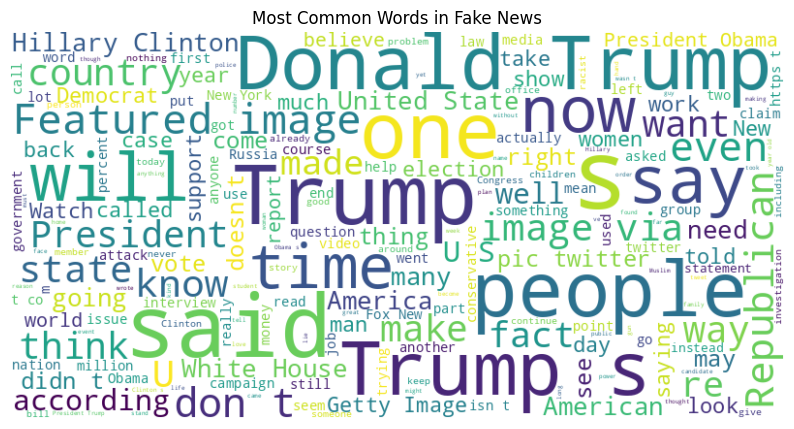

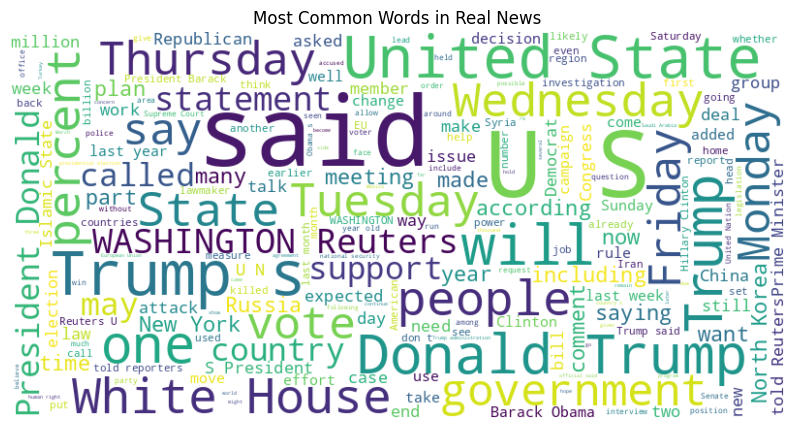

In [ ]:
#word clouds for fake and real news
fake_news = ' '.join(train_df[train_df['class'] == 0]['text'])
real_news = ' '.join(train_df[train_df['class'] == 1]['text'])

#word cloud for fake news
fake_wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(fake_news)
plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Fake News')
plt.axis('off')
plt.show()

#word cloud for real news
real_wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(real_news)
plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Real News')
plt.axis('off')
plt.show()

**Calculate Word Frequency :**

In [ ]:
def get_word_frequency(texts):
    word_counts = Counter()
    for text in texts:
        tokens = word_tokenize(text.lower())
        word_counts.update(tokens)
    return word_counts

Calculates word frequencies in a list of texts.

It first converts all words to lowercase and splits them into individual words (tokens). It then uses a Counter object to keep track of how many times each word occurs.  Finally, it returns this count of word frequencies.

In [ ]:
# Assuming Train_df['class'] == 0 for fake news and Train_df['class'] == 1 for real news
fake_word_counts = get_word_frequency(train_df[train_df['class'] == 0]['cleaned_text'])
real_word_counts = get_word_frequency(train_df[train_df['class'] == 1]['cleaned_text'])

**Frequnecy Cloud After Text Processing:**

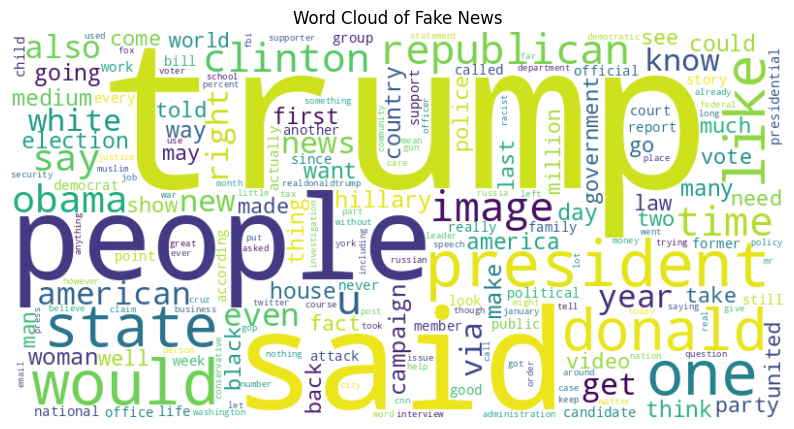

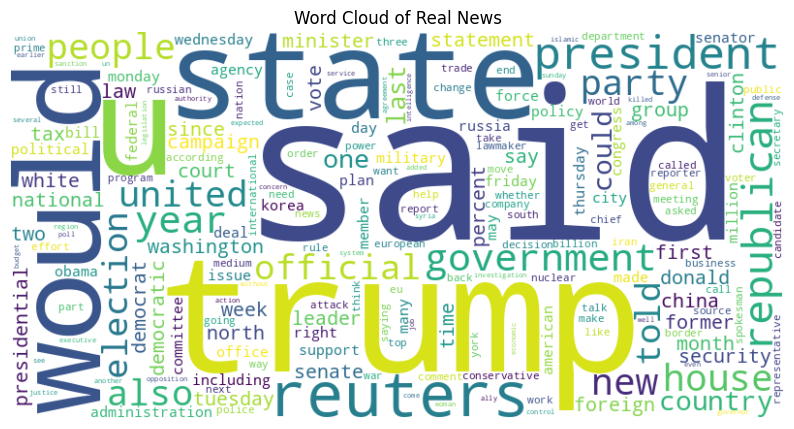

In [ ]:
# word cloud for fake news
plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_word_counts)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud of Fake News')
plt.axis('off')
plt.show()

# word cloud for real news
plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(real_word_counts)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud of Real News')
plt.axis('off')
plt.show()

**Plot most common words in Fake News:**

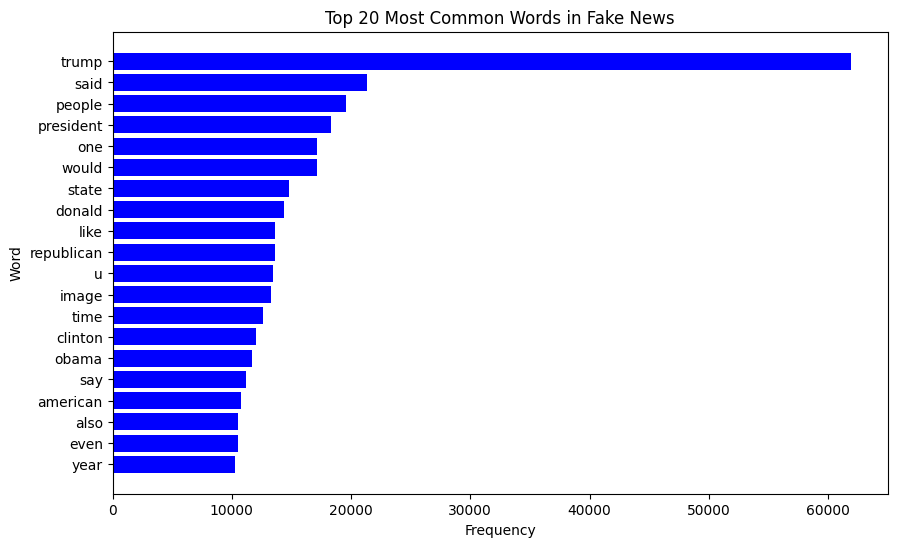

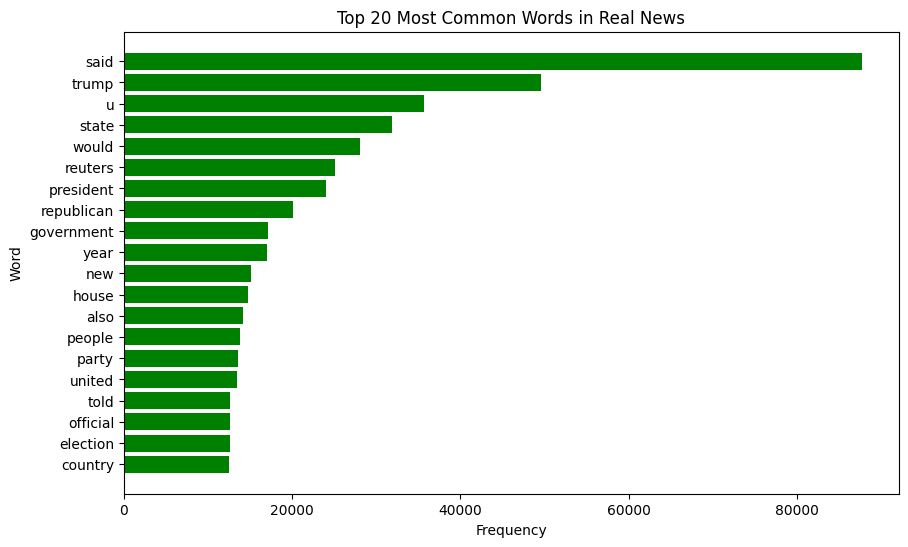

In [ ]:
plt.figure(figsize=(10, 6))
common_fake_words = fake_word_counts.most_common(20)
words, counts = zip(*common_fake_words)
plt.barh(words, counts, color='blue')
plt.title('Top 20 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis to have most common words at the top
plt.show()

# Plot most common words in real news
plt.figure(figsize=(10, 6))
common_real_words = real_word_counts.most_common(20)
words, counts = zip(*common_real_words)
plt.barh(words, counts, color='green')
plt.title('Top 20 Most Common Words in Real News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # Invert y-axis to have most common words at the top
plt.show()

**Fake :** The analysis reveals that fake news in the dataset often centers around U.S. politics, particularly Donald Trump. It frequently uses personalized language and reported speech. Common words like "one" and "would" are used to appear relatable. The presence of the word "image" suggests the use of visual elements in fake news.

**Real :** The most frequent words in real news are related to politics and reporting, with a focus on US political figures and events. like: "Trump" and "state"

**Distribution of News Articles by Year and Class:**

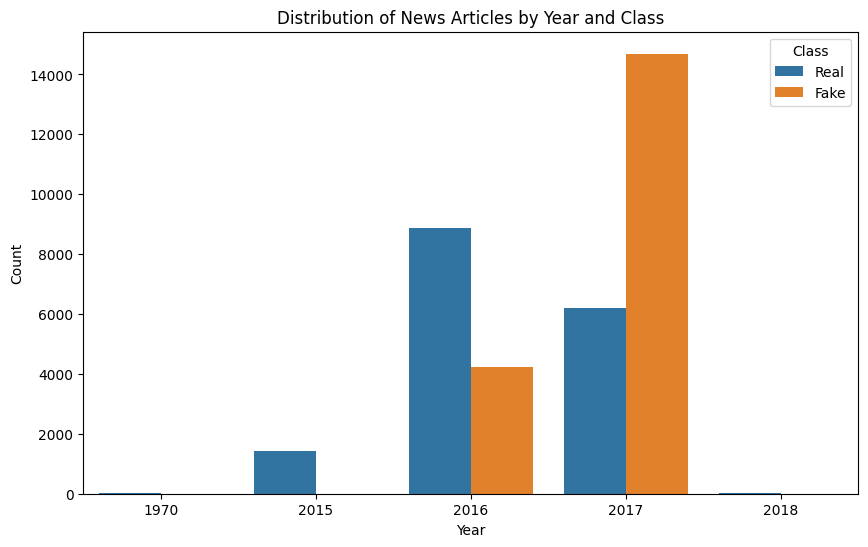

In [ ]:
train_df['year'] = train_df['date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='class', data=train_df)
plt.title('Distribution of News Articles by Year and Class')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Real', 'Fake'])
plt.show()

The news dataset is concentrated in 2017 and 2018, with very few articles from earlier years. The proportion of fake news significantly increased in 2017 and 2018.

 There may be a class imbalance in earlier years, with more real news than fake news.

**Donut chart for the Distribution of News Subjects by Class:**

In [ ]:
fig = px.sunburst(train_df, path=['class', 'subject'], title='Distribution of News Subjects by Class',
                  color='class', color_discrete_map={'Real': '#1f77b4', 'Fake': '#ff7f0e'},
                  maxdepth=2, branchvalues='total')
fig.update_traces(textinfo='label+percent entry')
fig.show()

**Category Distribution:**

The largest category is "News," accounting for 47% of the articles.
Other significant categories are "politicsNews" (28%) and "politics" (16%).

Smaller categories include "worldnews" (25%), "Government News," "not-news," and "US News" (each 2% or less).

**Real vs. Fake News:**

53% of news articles are classified as real (1).

47% of news articles are classified as fake (0).

**Distribution of Fake vs. Real News:**

In [ ]:
# Donut chart
fig = px.pie(train_df, names='class', title='Distribution of Fake vs. Real News',
             hole=0.3, color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

**Distribution of Article Lengths:**

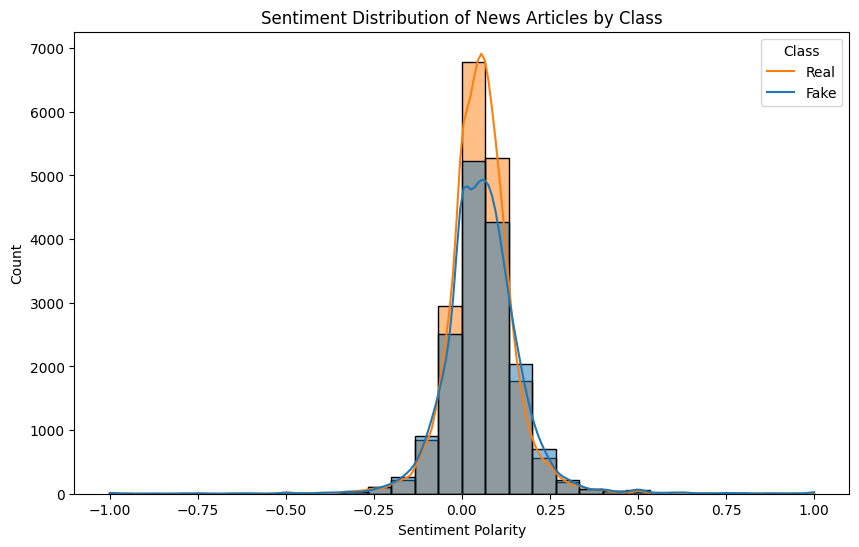

In [ ]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to news text
train_df['text_sentiment'] = train_df['text'].apply(get_sentiment)

# Plot sentiment distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='text_sentiment', hue='class', bins=30, kde=True)
plt.title('Sentiment Distribution of News Articles by Class')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Real', 'Fake'])
plt.show()


**TextBlob** is a Python library that makes natural language processing (NLP) tasks simpler and more accessible. It provides a user-friendly interface for common NLP operations

**Sentiment Analysis:** TextBlob is used to analyze the emotional tone of text, providing a simple way to gauge the overall sentiment.


1 - Defines a function (get_sentiment) to calculate the sentiment polarity (how positive or negative a text is) using the TextBlob library.

2 - Applies the function to each news article in the train_df DataFrame and stores the results in a new column called text_sentiment.

3 - Creates a histogram plot to visualize the distribution of sentiment polarity scores for both real and fake news articles.

# **Basic Data Analysis:**

**Summary statistics:**

In [ ]:
print("Summary statistics for the training data:")
print(train_df.describe(include='all'))

Summary statistics for the training data:
                 ID                                              title   text  \
count   35496.00000                                              35496  35496   
unique          NaN                                              35159  35107   
top             NaN  Factbox: Trump fills top jobs for his administ...          
freq            NaN                                                 14    378   
mean    19919.87624                                                NaN    NaN   
min         0.00000                                                NaN    NaN   
25%      8874.75000                                                NaN    NaN   
50%     19817.50000                                                NaN    NaN   
75%     30560.50000                                                NaN    NaN   
max     40405.00000                                                NaN    NaN   
std     12001.90579                                                

**Distribution of the target variable :**

In [ ]:
print("\nDistribution of the target variable (fake vs. real news):")
print(train_df['class'].value_counts())


Distribution of the target variable (fake vs. real news):
class
1    18924
0    16572
Name: count, dtype: int64


# **6 - Feature Engineering:**

In [ ]:
# Calculate the length of each news article
train_df['text_length'] = train_df['text'].apply(len)

# Summary statistics for text length
print("\nSummary statistics for text length:")
print(train_df['text_length'].describe())



Summary statistics for text length:
count    35496.000000
mean      2445.348321
std       1868.516859
min          1.000000
25%       1331.000000
50%       2230.500000
75%       3089.000000
max      32759.000000
Name: text_length, dtype: float64


In [ ]:
# Histogram with Plotly Express
fig = px.histogram(train_df, x='text_length', nbins=50, title='Distribution of Article Lengths')
fig.update_layout(xaxis_title='Text Length', yaxis_title='Frequency')
fig.show()

The histogram reveals that most articles in the dataset are short, with few outliers exceeding 10,000 words. This suggests the data likely consists of news or blog posts, and there might be a preference for concise writing. The lack of very long articles could be due to data collection bias.



**Text Number of Words :**

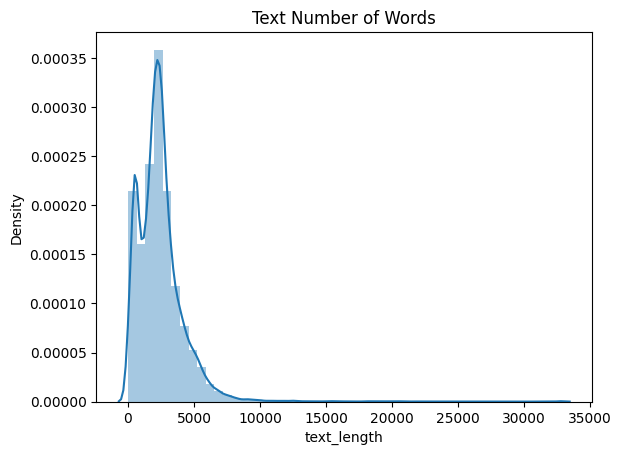

In [ ]:
sns.distplot(train_df['text_length'])
plt.title('Text Number of Words')
plt.show()

The majority of texts in the dataset are short, with most having between 0 and 5,000 words. The distribution is heavily right-skewed, indicating some outliers with very high word counts. The most common text length is around 1,000 words, and no text exceeds 35,000 words. This shows that the dataset likely contains short-form text like news articles or social media posts.

**Plot the distribution of article lengths:**

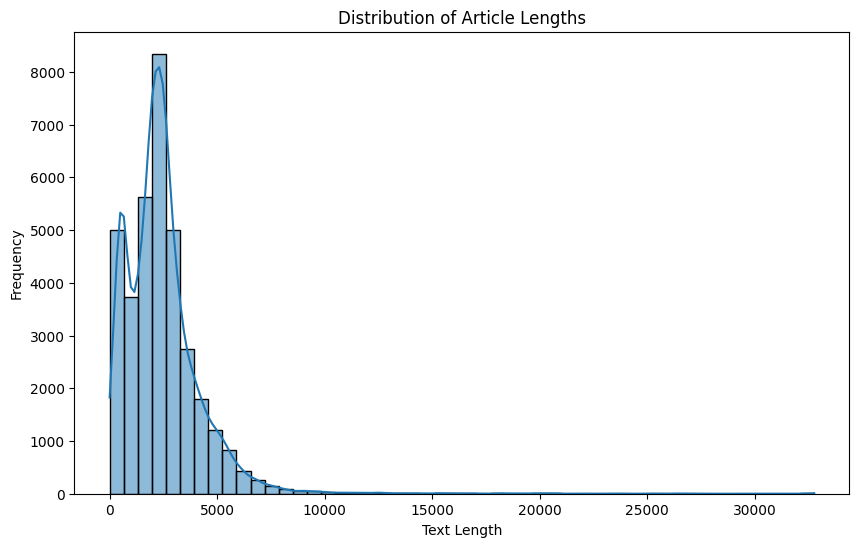

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


Most articles in the dataset are relatively short, with the majority having fewer than 5,000 words. The distribution is heavily skewed right, indicating a few outliers with much higher word counts. The most common article length is around 1,000 words, and no articles exceed 30,000 words.

**Feature Extraction (TF-IDF):**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['cleaned_text']).toarray()
y = train_df['class']

converted the cleaned text data into numerical features that machine learning models can understand.

It uses **TF-IDF (Term Frequency-Inverse Document Frequency)** to calculate the importance of each word in the dataset.

The max_features parameter limits the vocabulary to the 5000 most frequent words to reduce complexity and potentially improve model performance.

 The resulting feature matrix **X** and **target** labels **y** are ready to be used for model training.

# ***7 - Data Modelling :***

**Train-Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Models Training:**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Logistic Regression Accuracy: 0.9867605633802817
Random Forest Accuracy: 0.9867605633802817
Gradient Boosting Accuracy: 0.9946478873239437
Decision Tree Accuracy: 0.9928169014084507
CatBoost Accuracy: 0.9947887323943662
Neural Network Accuracy: 0.986056338028169


**Train the models and collect their accuracies:**

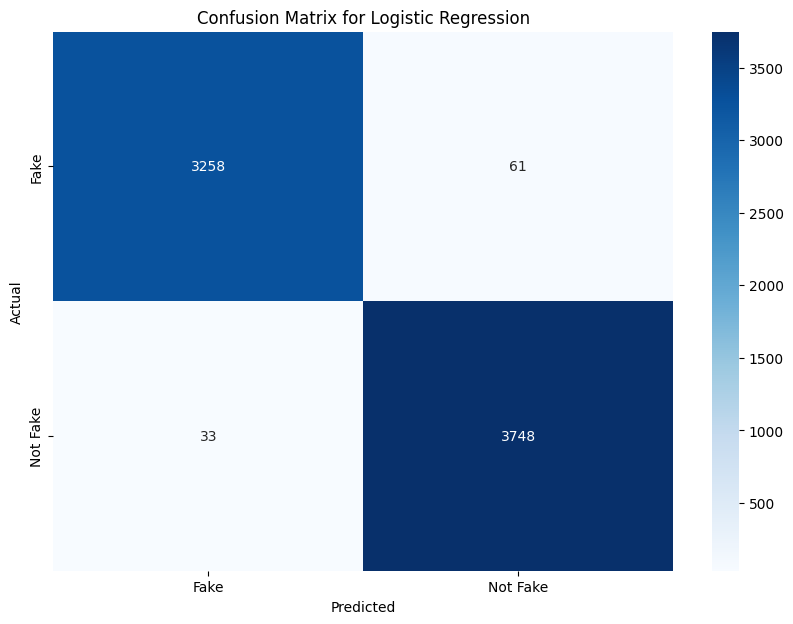

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      3319
    Not Fake       0.98      0.99      0.99      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



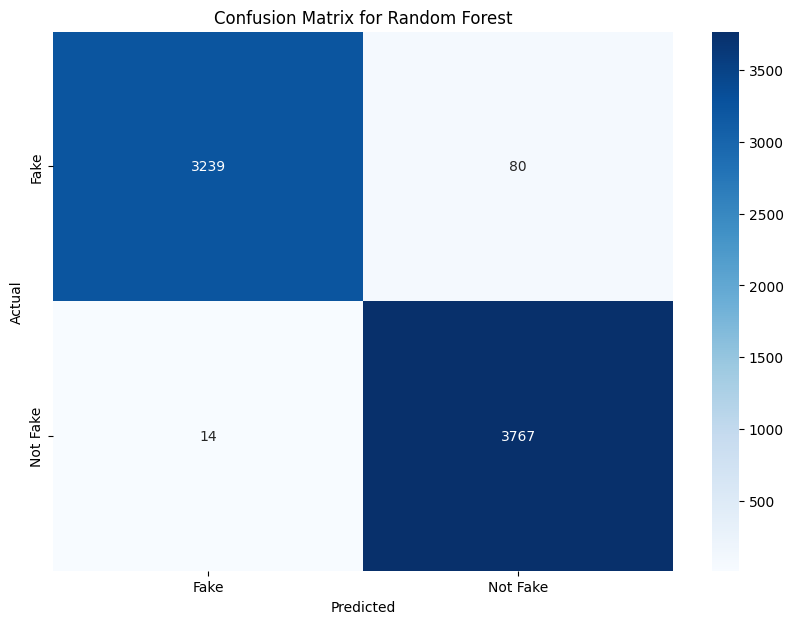

Classification Report for Random Forest:

              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      3319
    Not Fake       0.98      1.00      0.99      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



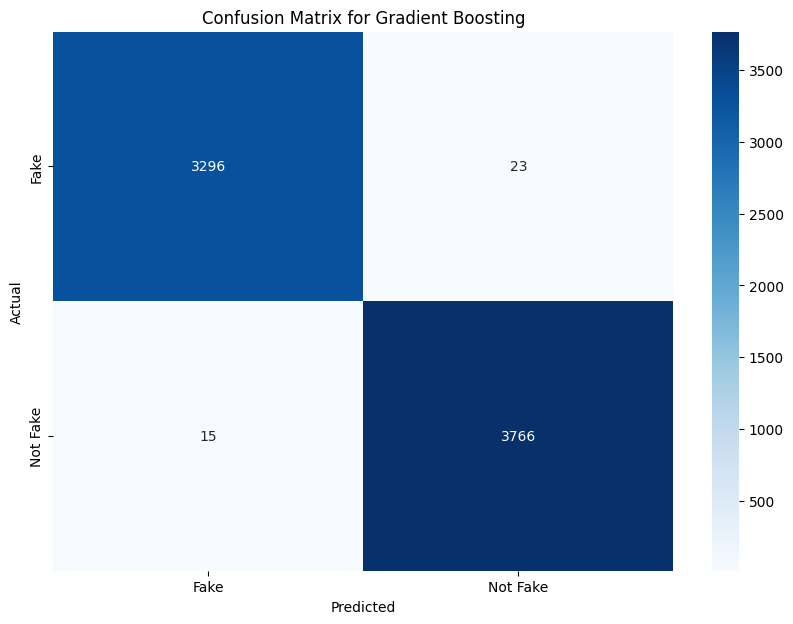

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3319
    Not Fake       0.99      1.00      0.99      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



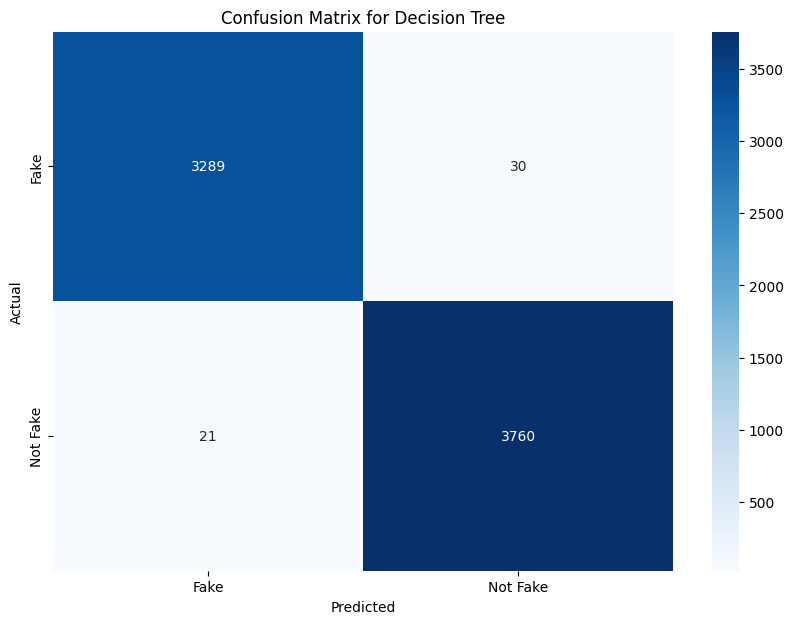

Classification Report for Decision Tree:

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3319
    Not Fake       0.99      0.99      0.99      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



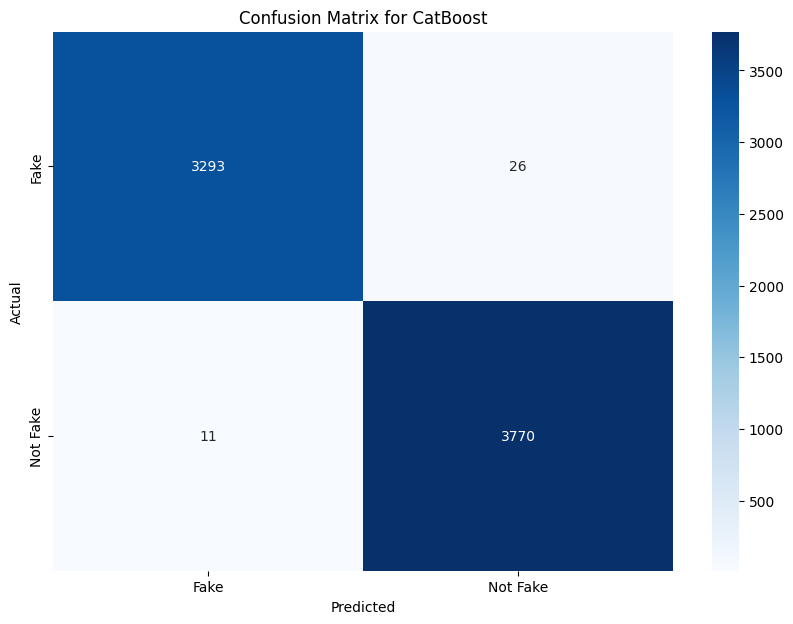

Classification Report for CatBoost:

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3319
    Not Fake       0.99      1.00      1.00      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



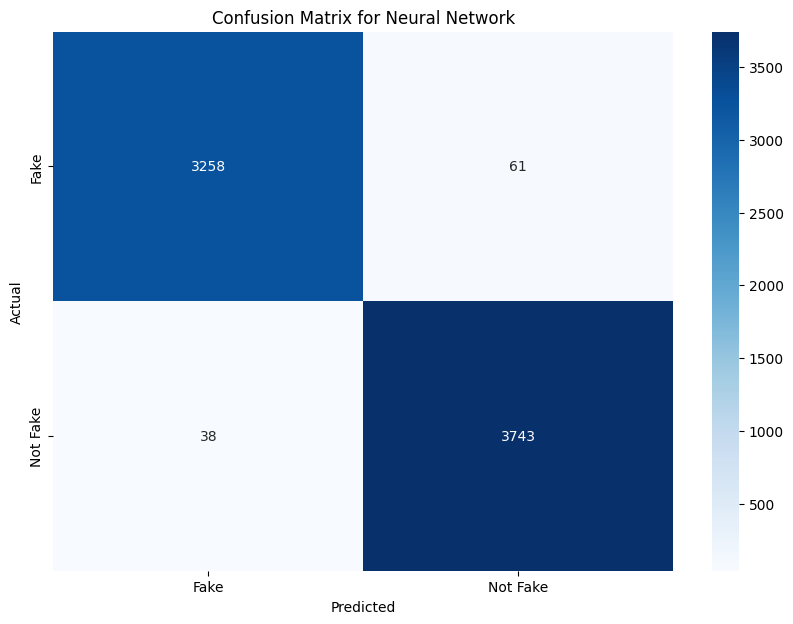

Classification Report for Neural Network:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      3319
    Not Fake       0.98      0.99      0.99      3781

    accuracy                           0.99      7100
   macro avg       0.99      0.99      0.99      7100
weighted avg       0.99      0.99      0.99      7100


------------------------------------------------------------



In [ ]:
model_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores.append((model_name, accuracy))

    # Confusion Matrix and Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Classification Report
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred, target_names=['Fake', 'Not Fake']))
    print('\n' + '-'*60 + '\n')




**Voting Classifier:**

Voting Classifier Results:
Accuracy: 0.9965
ROC AUC: 0.9965
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      3319
    Not Fake       1.00      1.00      1.00      3781

    accuracy                           1.00      7100
   macro avg       1.00      1.00      1.00      7100
weighted avg       1.00      1.00      1.00      7100


Model Comparison (including Voting Classifier):
                 Model     Score
6    Voting Classifier  0.996479
4             CatBoost  0.994789
2    Gradient Boosting  0.994648
3        Decision Tree  0.992817
0  Logistic Regression  0.986761
1        Random Forest  0.986761
5       Neural Network  0.986056


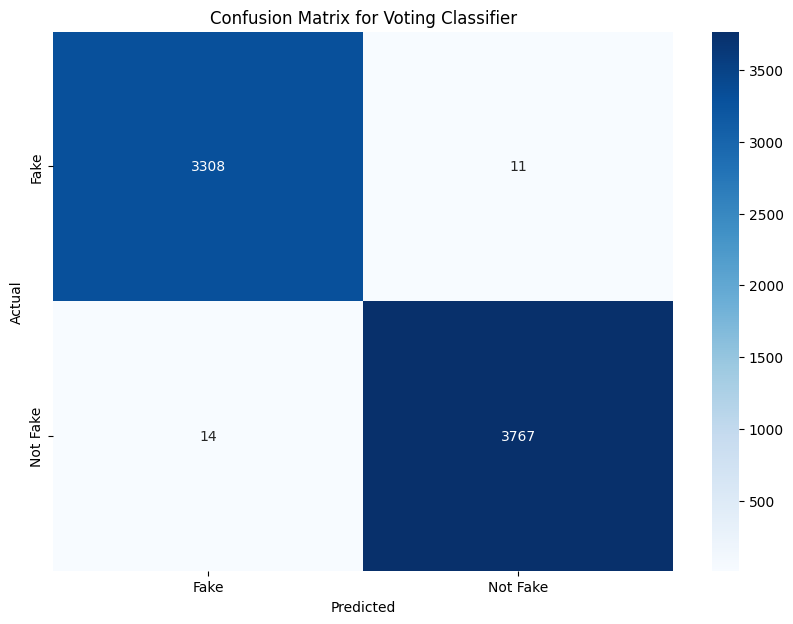

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=list(models.items()), voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Evaluate Voting Classifier
voting_accuracy = accuracy_score(y_test, y_pred)
voting_roc_auc = roc_auc_score(y_test, y_pred)

print('Voting Classifier Results:')
print(f'Accuracy: {voting_accuracy:.4f}')
print(f'ROC AUC: {voting_roc_auc:.4f}')
print(classification_report(y_test, y_pred, target_names=['Fake', 'Not Fake']))

# Add Voting Classifier results to the comparison DataFrame
models_df.loc[len(models_df)] = ['Voting Classifier', voting_accuracy]

# Sort the DataFrame again after adding the Voting Classifier
models_df = models_df.sort_values(by='Score', ascending=False)

print("\nModel Comparison (including Voting Classifier):")
print(models_df)

# Confusion Matrix for Voting Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()


**Create a DataFrame with model names and accuracy scores:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Model scores
model_scores = [
    ('Voting Classifier', 0.996479),
    ('CatBoost', 0.994789),
    ('Gradient Boosting', 0.994648),
    ('Decision Tree', 0.992817),
    ('Logistic Regression', 0.986761),
    ('Random Forest', 0.986761),
    ('Neural Network', 0.986056)
]

# Create a DataFrame
models_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
models_df = models_df.sort_values(by='Score', ascending=False)

# Print the DataFrame
print(models_df)

                 Model     Score
0    Voting Classifier  0.996479
1             CatBoost  0.994789
2    Gradient Boosting  0.994648
3        Decision Tree  0.992817
4  Logistic Regression  0.986761
5        Random Forest  0.986761
6       Neural Network  0.986056


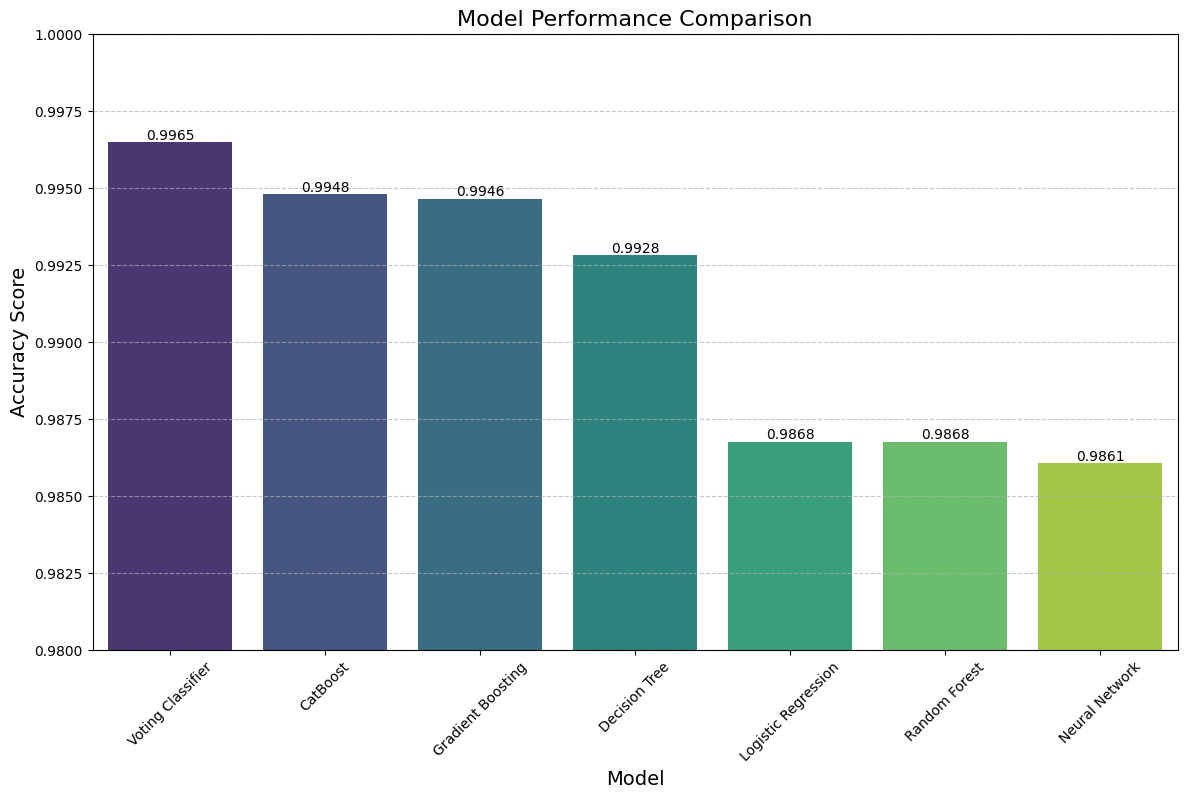

In [ ]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='Score', data=models_df, palette='viridis')

for index, value in enumerate(models_df['Score']):
    plt.text(index, value, f'{value:.4f}', color='black', ha="center", va="bottom")

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.98, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


**Prepare Submission:**

In [ ]:
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)
X_test_final = vectorizer.transform(test_df['cleaned_text']).toarray()

In [ ]:
models['Voting Classifier'] = voting_clf

**Create Submission file:**

In [ ]:
test_df['TARGET'] = models['Voting Classifier'].predict(X_test_final)  #  Voting Classifier is the best model
submission = test_df[['ID', 'TARGET']]
print(submission)
submission.to_csv('submission_voting.csv', index=False)